<a href="https://colab.research.google.com/github/jaewoong-87/deep_learning/blob/main/Neutral_network_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logic gate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
epochs = 1000
lr = 0.1

util function

In [5]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def mean_squared_error(pred_y, true_y):
  return 0.5 * (np.sum(true_y - pred_y)**2)

def cross_entropy_error(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  return -np.sum(true_y * np.log(pred_y + delta))

def cross_entropy_error_for_batch(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  batch_size = pred_y.shape[0]
  return -np.sum(true_y * np.log(pred_y + delta)) / batch_size

def cross_entropy_error_for_bin(pred_y, true_y):
  return 0.5 * np.sum((-true_y * np.log(pred_y) - (1 - true_y)* np.log(1 - pred_y)))

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a=np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

def differential(f, x):
  eps = 1e-5
  diff_value = np.zeros_like(x)

  for i in range(x.shape[0]):
    temp_val = x[i]

    x[i] = temp_val + eps
    f_h1 = f(x)

    x[i] = temp_val - epochs
    f_h2 = f(x)

    diff_value[i] = (f_h1 - f_h2) / (2 * eps)
    x[i] = temp_val

    return diff_value

In [7]:
class LogicGateNet():

  def __init__(self):
    def weight_init():
      np.random.seed(1)
      weights = np.random.randn(2)
      bias = np.random.rand(1)

      return weights, bias

    self.weights, self.bias = weight_init()

  def predict(self, x):
    W = self.weights.reshape(-1, 1)
    b = self.bias

    pred_y = sigmoid(np.dot(x, W) + b)
    return pred_y

  def loss(self, x, true_y):
    pred_y = self.predict(x)
    return cross_entropy_error_for_bin(pred_y, true_y)

  def get_gradient(self, x, t):
    def loss_grad(grad):
      return self.loss(x,t)

    grad_W = differential(loss_grad, self.weights)
    grad_B = differential(loss_grad, self.bias)

    return grad_W, grad_B

AND Gate

In [13]:
AND = LogicGateNet()

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[0],[0],[1]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = AND.get_gradient(X, Y)

  AND.weights -= lr * grad_W
  AND.bias -= lr * grad_B

  loss = AND.loss(X,Y)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("epoch:{} , cost:{}. weight:{}. bias:{}".format(i+1,loss, AND.weights, AND.bias))


epoch:100 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:200 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:300 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:400 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:500 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:600 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:700 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:800 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:900 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:1000 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


In [14]:
print(AND.predict(X))

[[nan]
 [nan]
 [nan]
 [nan]]


OR Gate

In [15]:
OR = LogicGateNet()

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_2 = np.array([[0],[1],[1],[1]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = OR.get_gradient(X, Y_2)

  OR.weights -= lr * grad_W
  OR.bias -= lr * grad_B

  loss = OR.loss(X,Y_2)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("epoch:{} , cost:{}. weight:{}. bias:{}".format(i+1,loss, OR.weights, OR.bias))

epoch:100 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:200 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:300 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:400 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:500 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:600 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:700 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:800 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:900 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]
epoch:1000 , cost:nan. weight:[        nan -0.61175641]. bias:[nan]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


In [16]:
print(OR.predict(X))

[[nan]
 [nan]
 [nan]
 [nan]]


MNIST

In [17]:
import tensorflow as tf
import time
from tqdm.notebook import tqdm

In [18]:
mnist =tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(28, 28)


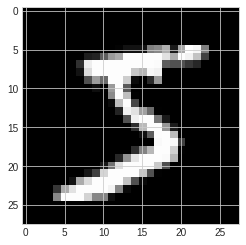

In [20]:
img = x_train[0]
print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()

In [21]:
y_train[0]

5

data preprocessing

In [22]:
def flatten_for_mnist(x):
  temp = np.zeros((x.shape[0], x[0].size))

  for idx, data in enumerate(x):
    temp[idx,:] = data.flatten()

  return temp

In [24]:
x_train, x_test = x_train /255.0, x_test / 255.0 #normalization

x_train = flatten_for_mnist(x_train)  #flatten x_train and x_test
x_test = flatten_for_mnist(x_test)

print(x_train.shape)
print(x_test.shape)

y_train_ohe = tf.one_hot(y_train, depth=10).numpy()
y_test_ohe = tf.one_hot(y_test, depth=10).numpy()

print(y_train_ohe.shape)
print(y_test_ohe.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [25]:
print(x_train[0].max(), x_train[0].min())
print(y_train_ohe[0])

0.00392156862745098 0.0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


hyper parameter

In [26]:
epochs = 2
lr = 0.1
batch_size = 100
train_size = x_train.shape[0]

In [28]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def mean_squared_error(pred_y, true_y):
  return 0.5 * (np.sum(true_y - pred_y)**2)

def cross_entropy_error(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  return -np.sum(true_y * np.log(pred_y + delta))

def cross_entropy_error_for_batch(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  batch_size = pred_y.shape[0]
  return -np.sum(true_y * np.log(pred_y + delta)) / batch_size

def cross_entropy_error_for_bin(pred_y, true_y):
  return 0.5 * np.sum((-true_y * np.log(pred_y) - (1 - true_y)* np.log(1 - pred_y)))

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a=np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

def differential_1d(f, x):
  
  eps = 1e-5
  diff_value = np.zeros_like(x)

  for i in range(x.shape[0]):
    temp_val = x[i]

    x[i] = temp_val + eps
    f_h1 = f(x)

    x[i] = temp_val - epochs
    f_h2 = f(x)

    diff_value[i] = (f_h1 - f_h2) / (2 * eps)
    x[i] = temp_val

    return diff_value

def differential_2d(f, X):
  if X.ndim == 1:
    return differential_1d(f,X)
  else:
    grad = np.zeros_like(X)

    for idx, x in enumerate(X):
      grad[idx] = differential_1d(f, x)

    return grad

In [37]:
class MyModel(object):

  def __init__(self):
    

    def weight_init(input_nodes, hidden_nodes, output_units):
      np.random.seed(777)
      params ={}
      params['w_1'] =0.01 * np.random.randn(input_nodes, hidden_nodes)
      params['b_1'] =np.zeros(hidden_nodes)
      params['w_2'] =0.01 * np.random.randn(hidden_nodes, output_units)
      params['b_2'] =np.zeros(output_units)
      return params

    self.params = weight_init(784, 64, 10)
  
  def predict(self, x):
    W_1, W_2 = self.params['w_1'], self.params['w_2']
    B_1, B_2 = self.params['b_1'], self.params['b_2']

    A1 = np.dot(x, W_1) + B_1
    Z1 = sigmoid(A1)

    A2 = np.dot(Z1, W_2) + B_2
    pred_y = softmax(A2)

    return pred_y

def loss(self, x, true_y):
  pred_y = self.predict(x)
  return cross_entropy_error_for_bin(pred_y, true_y)

def accuracy(self, x, true_y):
  pred_y = self.predict(x)
  y_argmax = np.argmax(pred_y, axis=1)
  t_argmax = np.argmax(true_y, axis=1)
  
  accuracy = np.sum(y_argmax == t_argmax) / float(x.shape[0])

  return accuracy

def get_gradient(self, x, t):
  
  def loss_grad(grad):
    return self.loss(x, t)
  
  grads={}
  grads['w_1'] = differential_2d(loss_grad, self.params['w_1'])
  grads['b_1'] = differential_2d(loss_grad, self.params['b_1'])
  grads['w_2'] = differential_2d(loss_grad, self.params['w_2'])
  grads['b_2'] = differential_2d(loss_grad, self.params['b_2'])

  return grads



In [38]:
model =MyModel()

train_loss_list = list()
train_acc_list = list()
test_acc_list = list()
iter_per_epoch = max(train_size / batch_size, 1)

start_time = time.time()
for i in tqdm(range(epochs)):

  batch_idx = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_idx]
  y_batch = y_train_ohe[batch_idx]

  grads = model.get_gradient(x_batch, y_batch)

  for key in grads.keys():
    model.params[key] -= lr * grads[key]

  loss = model.loss(x_batch, y_batch)
  train_loss_list.append(loss)

  train_accuracy = model.accuracy(x_train, y_train_ohe)
  test_accuracy = model.accuracy(x_test, y_test_ohe)
  train_acc_list.append(train_accuracy) 
  test_acc_list.append(test_accuracy) 

  print("epoch:{}, cost:{}, train accuracy:{}, test accuracy:{}".foramt(i+1, loss, train_accuracy, test_accuracy))

  end_time = time.time()

  print("total learning time:{:.3f}s".format(end_time - start_time))

AttributeError: ignored